In [1]:
!pip install tensorflow

In [2]:
!python --version

Python 3.12.4


In [3]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Importing libraries for data manipulation and preprocessing
import numpy as np
import pandas as pd

# Importing libraries for machine learning models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from warnings import filterwarnings
filterwarnings('ignore')


In [5]:
df=pd.read_csv('train.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [8]:
df['Name'].str.replace('.','')

0                                 Braund, Mr Owen Harris
1      Cumings, Mrs John Bradley (Florence Briggs Tha...
2                                  Heikkinen, Miss Laina
3            Futrelle, Mrs Jacques Heath (Lily May Peel)
4                                Allen, Mr William Henry
                             ...                        
886                                 Montvila, Rev Juozas
887                          Graham, Miss Margaret Edith
888              Johnston, Miss Catherine Helen "Carrie"
889                                 Behr, Mr Karl Howell
890                                   Dooley, Mr Patrick
Name: Name, Length: 891, dtype: object

In [9]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [10]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [11]:
df['Age'].replace('0.92','28.0')

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:

df['Age'].fillna(df['Age'].median(), inplace=True)



In [14]:
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)

In [15]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<Axes: xlabel='Survived', ylabel='Sex'>

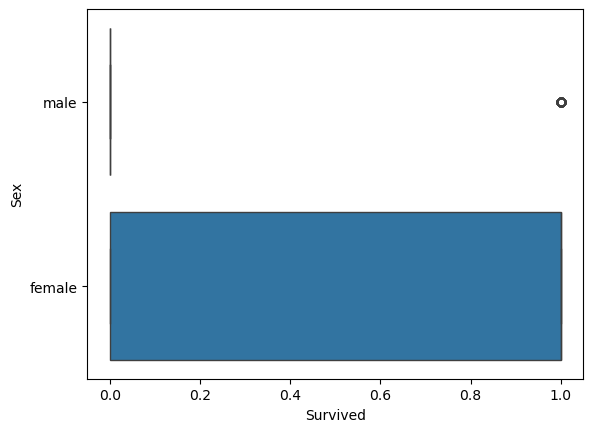

In [17]:
import seaborn as sns
sns.boxplot(data=df,x=df['Survived'],y=df['Sex'])

<Axes: xlabel='Age'>

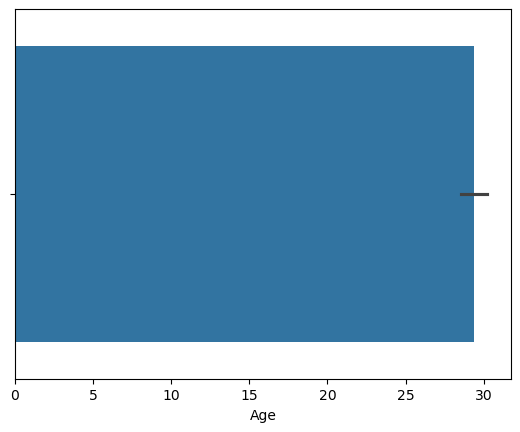

In [18]:
sns.barplot(x=df['Age'],data=df)

<Axes: >

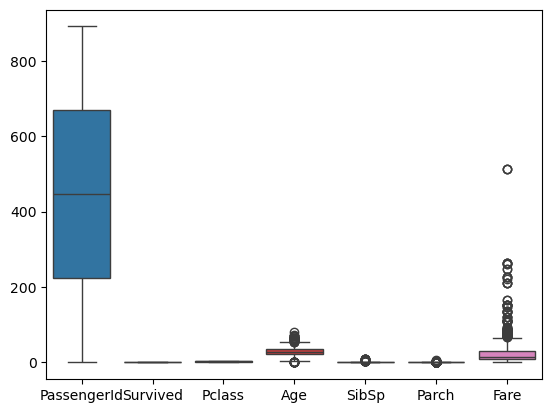

In [19]:
sns.boxplot(data=df)

<Axes: ylabel='Age'>

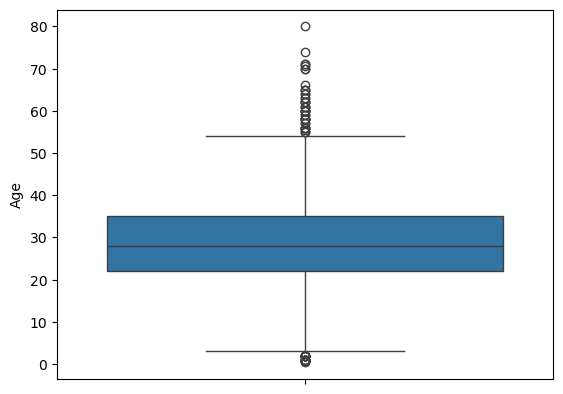

In [20]:
sns.boxplot(data=df['Age'])

<Axes: ylabel='Fare'>

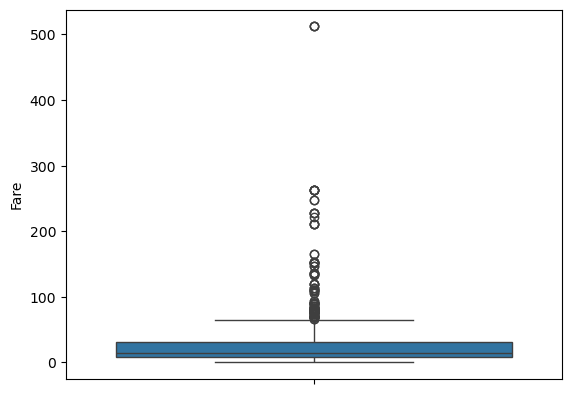

In [21]:
sns.boxplot(data=df['Fare'])

In [22]:
#Outliers are present in age and fare column

In [23]:
df_numeric = df.select_dtypes(include=['number'])
df_categoric = df.select_dtypes(exclude=['number'])

In [24]:
df_numeric

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,28.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [25]:
df_categoric

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,B96 B98,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,B96 B98,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,B96 B98,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,B96 B98,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,B96 B98,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [26]:
# Convert columns to numeric, forcing invalid values to NaN
df = df.apply(pd.to_numeric, errors='coerce')

In [27]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Recalculate Q1, Q3, and IQR on numeric columns only
q1 = df_numeric.quantile(0.25)
q3 = df_numeric.quantile(0.75)
iqr = q3 - q1

# Define lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify rows containing outliers
outliers = df_numeric[(df_numeric < lower_bound) | (df_numeric > upper_bound)].any(axis=1)

# Print rows that contain outliers
print("Outliers:")
print(df[outliers])

Outliers:
     PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch    Ticket  \
1              2         1       1   NaN  NaN  38.0      1      0       NaN   
7              8         0       3   NaN  NaN   2.0      3      1  349909.0   
8              9         1       3   NaN  NaN  27.0      0      2  347742.0   
10            11         1       3   NaN  NaN   4.0      1      1       NaN   
11            12         1       1   NaN  NaN  58.0      0      0  113783.0   
..           ...       ...     ...   ...  ...   ...    ...    ...       ...   
871          872         1       1   NaN  NaN  47.0      1      1   11751.0   
879          880         1       1   NaN  NaN  56.0      0      1   11767.0   
880          881         1       2   NaN  NaN  25.0      0      1  230433.0   
885          886         0       3   NaN  NaN  39.0      0      5  382652.0   
888          889         0       3   NaN  NaN  28.0      1      2       NaN   

        Fare  Cabin  Embarked  
1    71.2

In [28]:
# Assuming `outliers` is a boolean series indicating rows with outliers
# Use the negation operator `~` to keep rows that are NOT outliers
df_cleaned = df[~outliers]

# Display the cleaned DataFrame without outliers
print(df_cleaned)

     PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch    Ticket  \
0              1         0       3   NaN  NaN  22.0      1      0       NaN   
2              3         1       3   NaN  NaN  26.0      0      0       NaN   
3              4         1       1   NaN  NaN  35.0      1      0  113803.0   
4              5         0       3   NaN  NaN  35.0      0      0  373450.0   
5              6         0       3   NaN  NaN  28.0      0      0  330877.0   
..           ...       ...     ...   ...  ...   ...    ...    ...       ...   
884          885         0       3   NaN  NaN  25.0      0      0       NaN   
886          887         0       2   NaN  NaN  27.0      0      0  211536.0   
887          888         1       1   NaN  NaN  19.0      0      0  112053.0   
889          890         1       1   NaN  NaN  26.0      0      0  111369.0   
890          891         0       3   NaN  NaN  32.0      0      0  370376.0   

        Fare  Cabin  Embarked  
0     7.2500    NaN

In [29]:

# Replace all NaN values in the DataFrame
df.fillna(0, inplace=True)  # Replace with 0

# Check if any NaN values still exist
print(df.isnull().sum())  # Prints the count of NaNs per column



PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


<Axes: xlabel='Age', ylabel='Survived'>

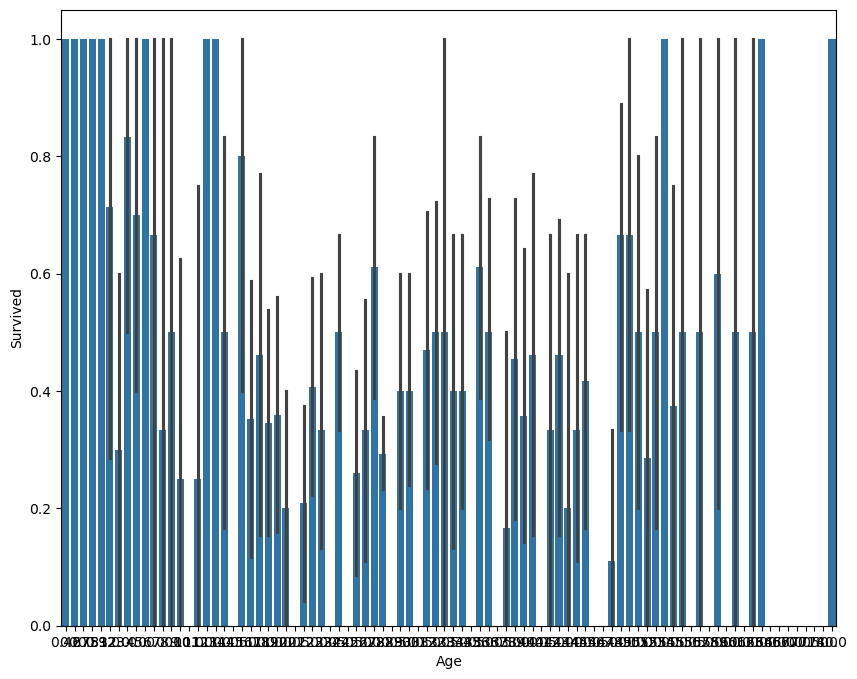

In [30]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
sns.barplot(x=df['Age'],y=df['Survived'])

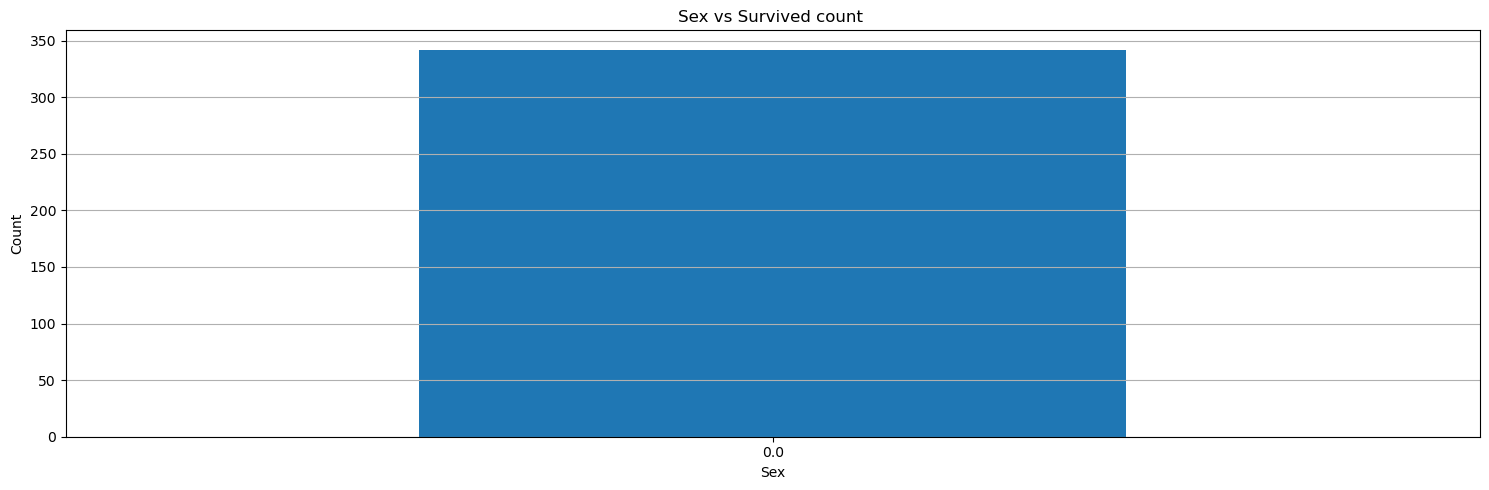

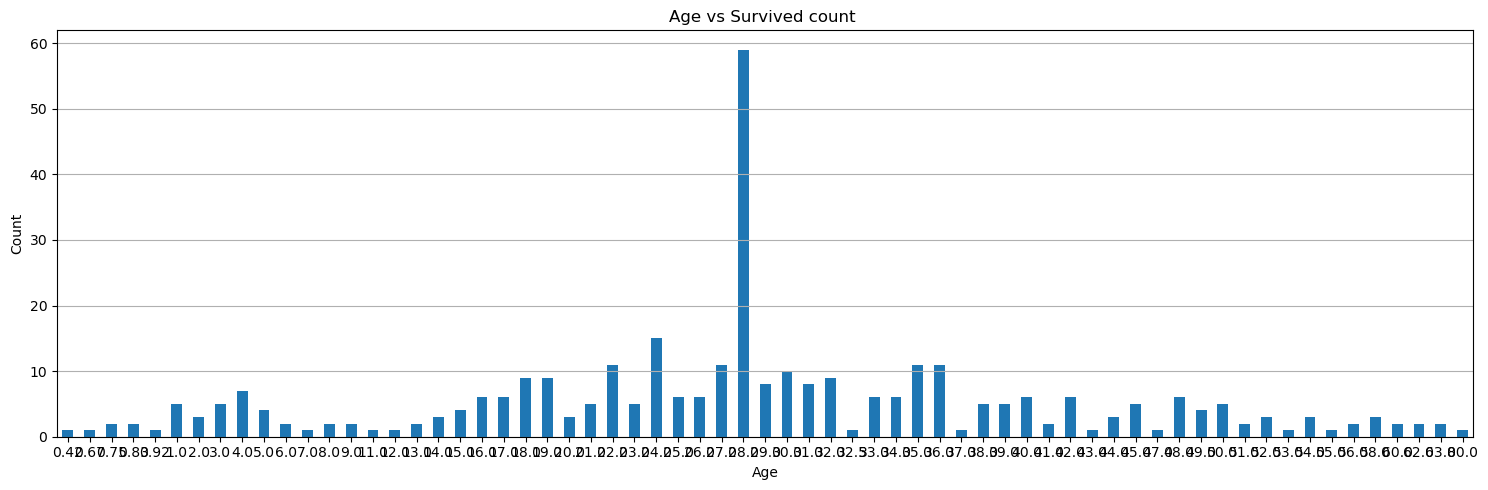

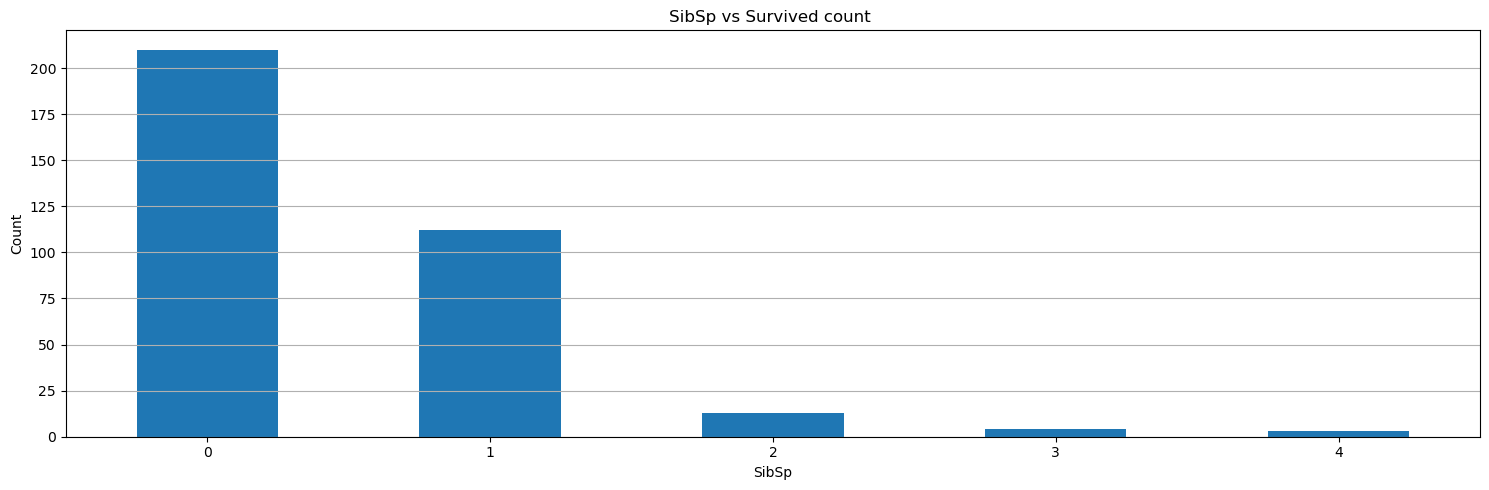

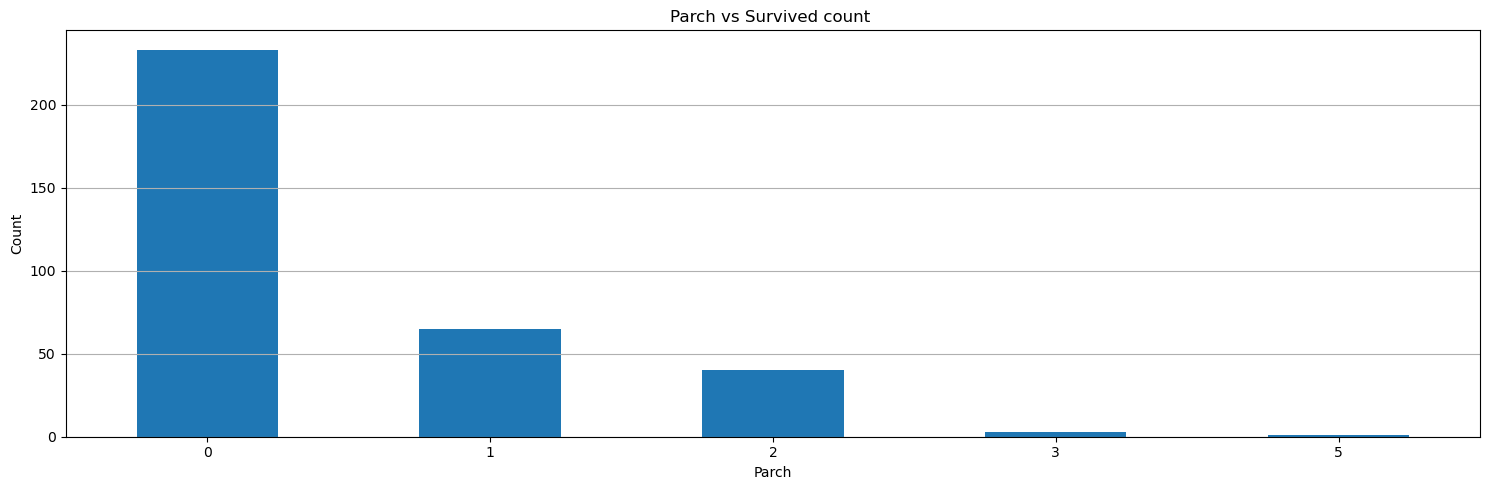

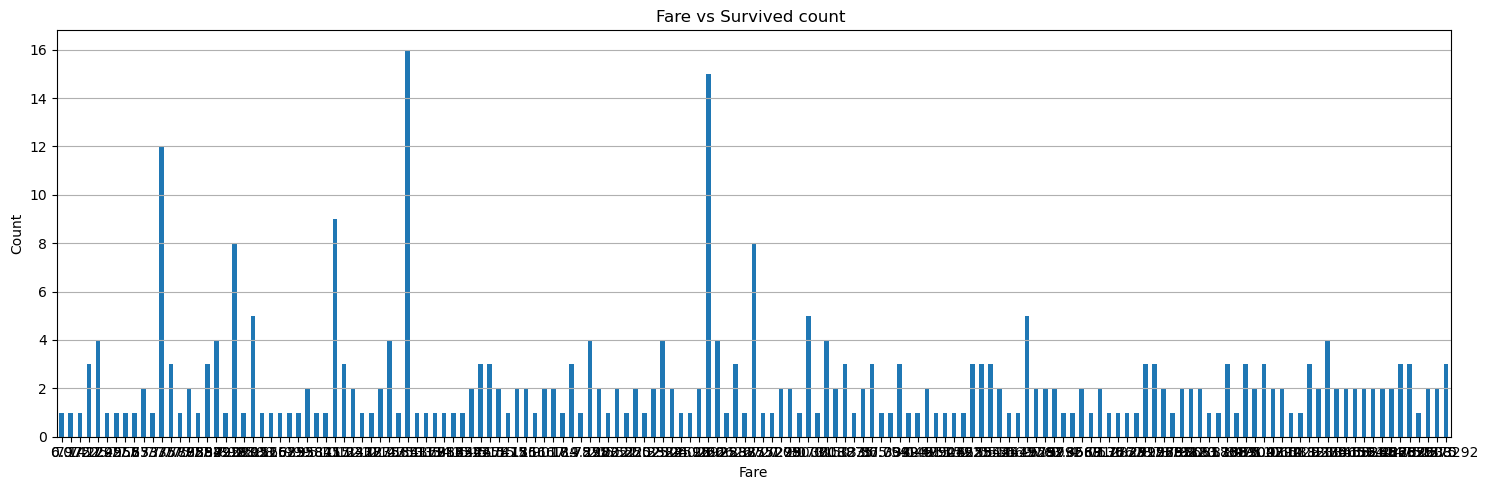

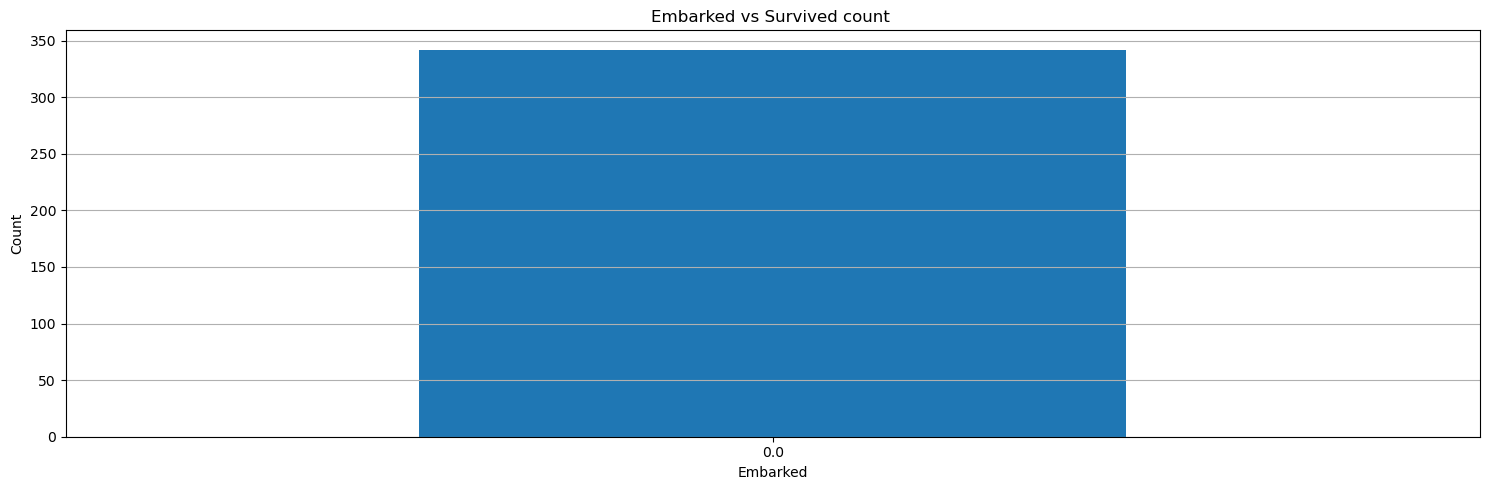

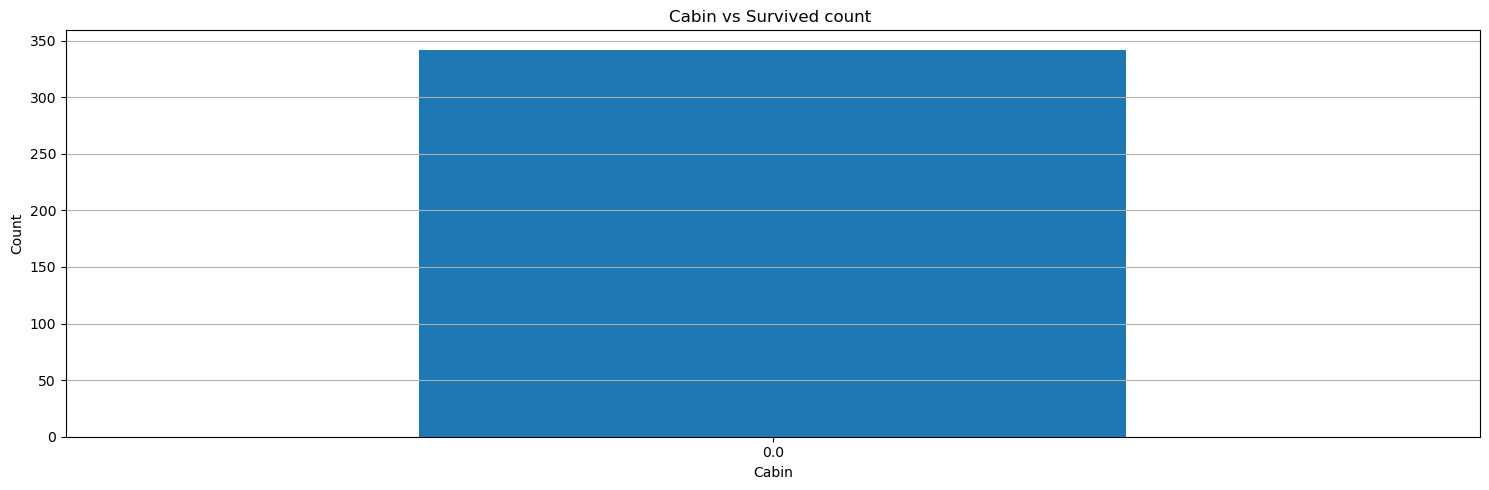

In [31]:
target_col = 'Survived'
features = ['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin']

for col in features:
    survived_counts = df[df['Survived'] == 1][col].value_counts().sort_index()

    plt.figure(figsize=(15, 5))
    survived_counts.plot(kind='bar')
    plt.title(f'{col} vs Survived count ')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

In [32]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

encoder = LabelEncoder()

def data_encoding(df):
    df['Sex'] = encoder.fit_transform(df['Sex'])
    df['Cabin'] = encoder.fit_transform(df['Cabin'])
    df['Embarked'] = encoder.fit_transform(df['Embarked'])
    df['Name'] = encoder.fit_transform(df['Name'])
    df['Ticket'] = encoder.fit_transform(df['Ticket'])
    return df

df = data_encoding(df)


# scaler = StandardScaler()
# df_train[['Age', 'Fare', 'SibSp', 'Parch']] = scaler.fit_transform(df_train[['Age', 'Fare', 'SibSp', 'Parch']])
# df_test[['Age', 'Fare', 'SibSp', 'Parch']] = scaler.transform(df_test[['Age', 'Fare', 'SibSp', 'Parch']])


# Select Feature
df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']].head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,22.0,1,0,7.2500,0,0
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,0,0
3,1,0,35.0,1,0,53.1000,0,0
4,3,0,35.0,0,0,8.0500,0,0
5,3,0,28.0,0,0,8.4583,0,0
6,1,0,54.0,0,0,51.8625,0,0
7,3,0,2.0,3,1,21.0750,0,0
8,3,0,27.0,0,2,11.1333,0,0
9,2,0,14.0,1,0,30.0708,0,0


In [33]:
df_numeric


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,NaN,NaN,22.0,1,0,NaN,7.2500,NaN,NaN
1,2,1,1,NaN,NaN,38.0,1,0,NaN,71.2833,NaN,NaN
2,3,1,3,NaN,NaN,26.0,0,0,NaN,7.9250,NaN,NaN
3,4,1,1,NaN,NaN,35.0,1,0,113803.0,53.1000,NaN,NaN
4,5,0,3,NaN,NaN,35.0,0,0,373450.0,8.0500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,NaN,NaN,27.0,0,0,211536.0,13.0000,NaN,NaN
887,888,1,1,NaN,NaN,19.0,0,0,112053.0,30.0000,NaN,NaN
888,889,0,3,NaN,NaN,28.0,1,2,NaN,23.4500,NaN,NaN
889,890,1,1,NaN,NaN,26.0,0,0,111369.0,30.0000,NaN,NaN


<Axes: xlabel='Survived'>

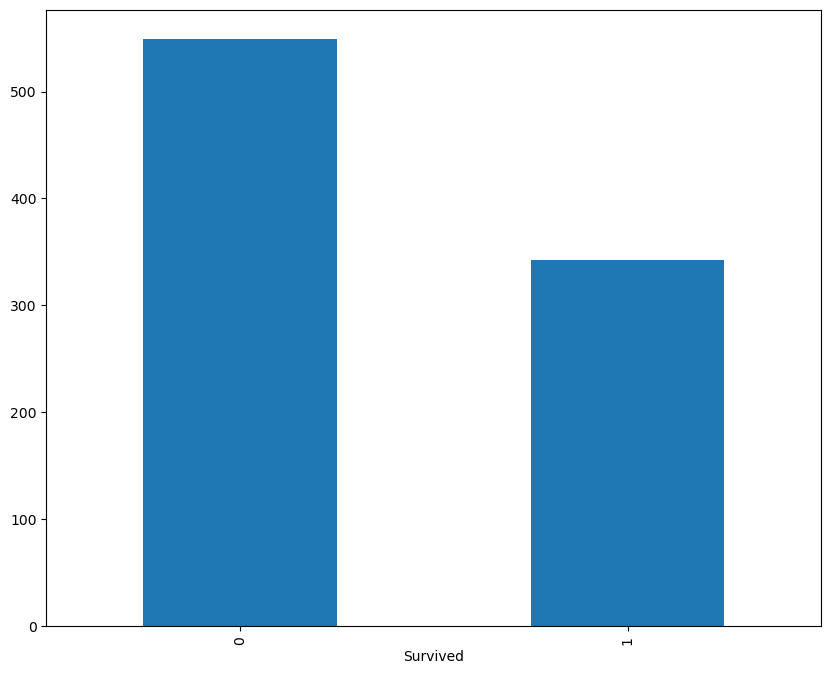

In [34]:
df["Survived"].value_counts().plot(kind="bar")

In [35]:
pd.crosstab(df["Sex"], df["Survived"])

Survived,0,1
Sex,,
0,549,342


In [36]:

def plot_crosstab(column1, column2, title, xlabel):
    """
    Plots a Cross tab between 2 columns
    """
    pd.crosstab(df[column1], df[column2]).plot(kind="bar", figsize=(10, 6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.xticks(rotation=0)
    plt.ylabel("Passenger Count")
    plt.legend(["Did Not Survive", "Survived"])
    plt.show()

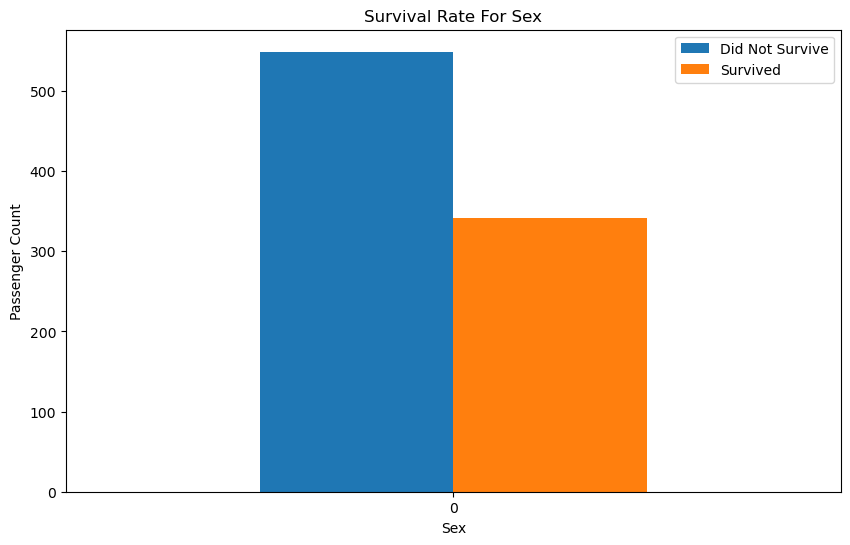

In [37]:
plot_crosstab("Sex", "Survived", "Survival Rate For Sex", "Sex")

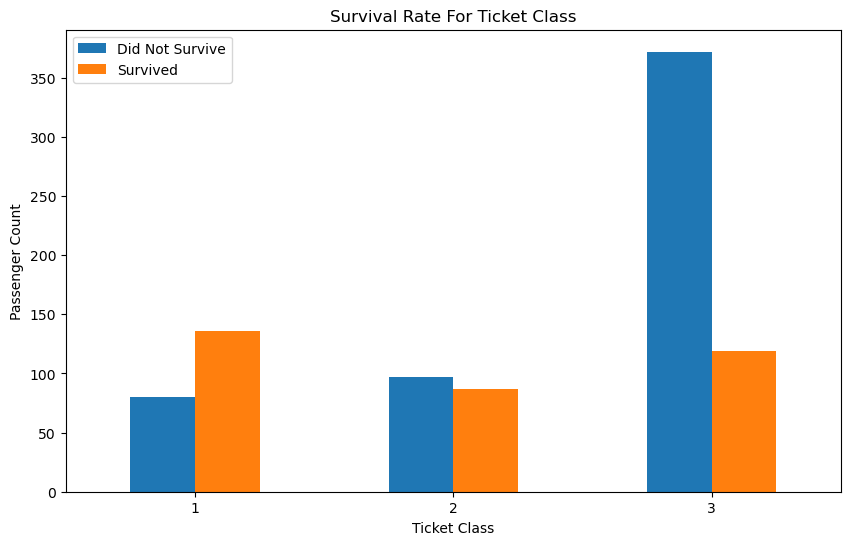

In [38]:
plot_crosstab("Pclass", "Survived", "Survival Rate For Ticket Class", "Ticket Class")

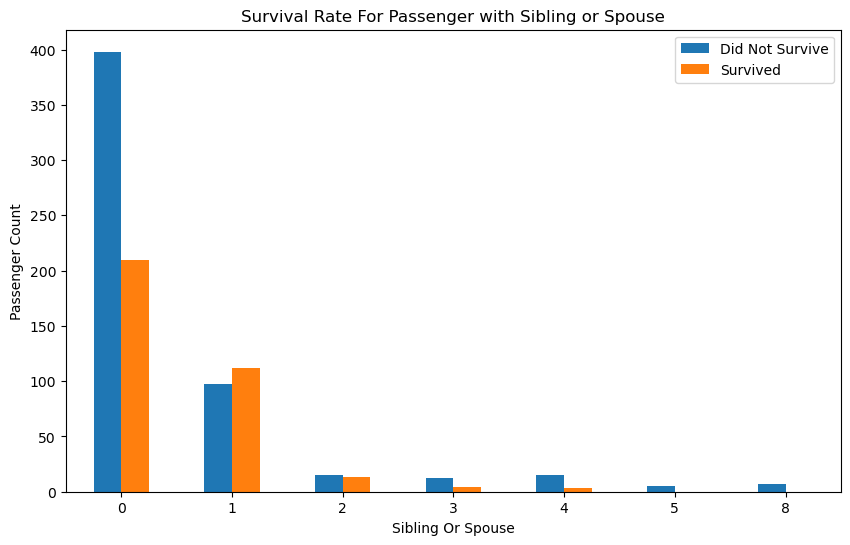

In [39]:
plot_crosstab("SibSp", "Survived", "Survival Rate For Passenger with Sibling or Spouse", "Sibling Or Spouse")

<Axes: ylabel='Frequency'>

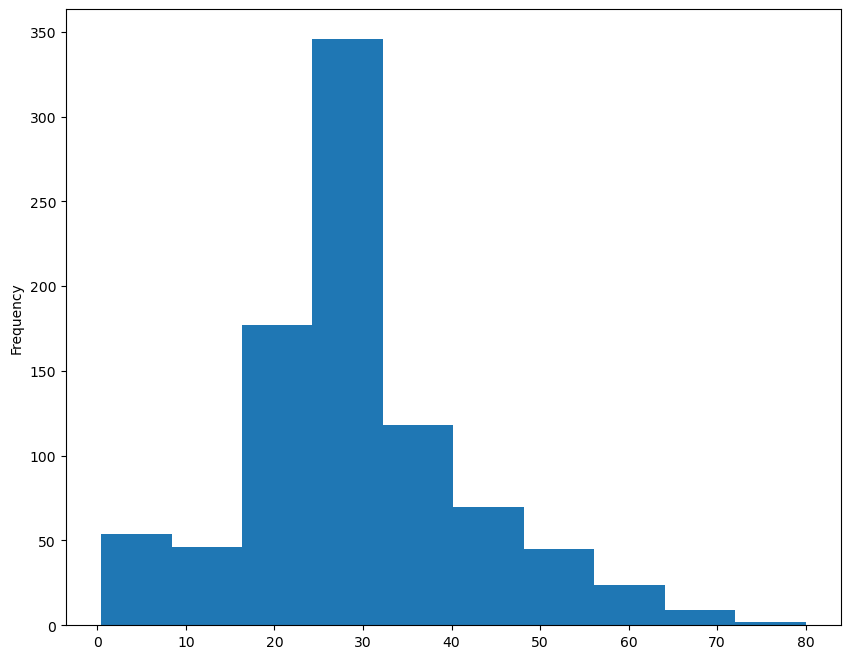

In [40]:
df.Age.plot.hist()

In [41]:
X = df.drop("Survived", axis=1)
y  = df["Survived"]

<Axes: >

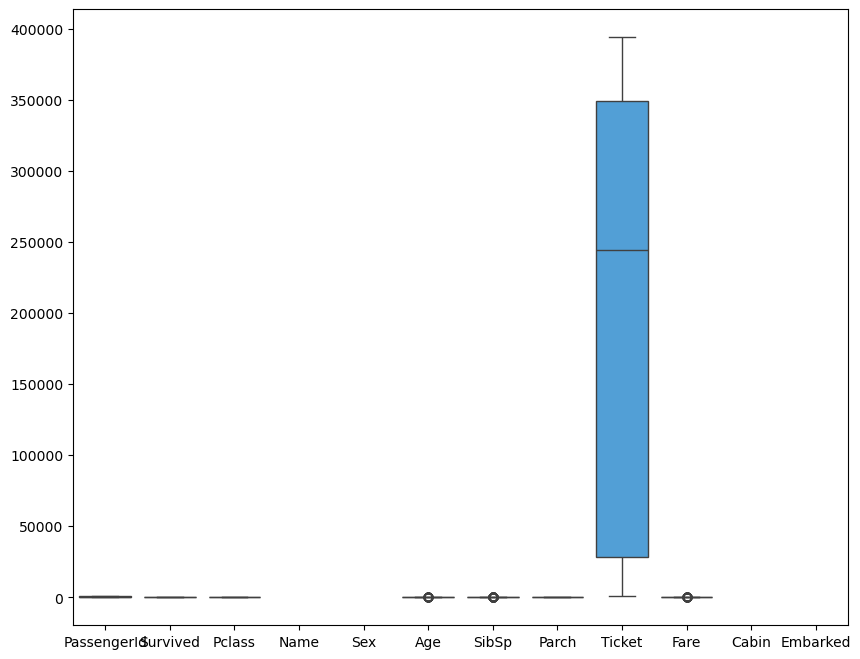

In [42]:
sns.boxplot(data=df_cleaned)

In [43]:
from sklearn.preprocessing import StandardScaler


# Standard scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Convert to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

print(scaled_df)

     PassengerId  Survived    Pclass  Name  Sex       Age     SibSp     Parch  \
0      -1.730108 -0.789272  0.827377   0.0  0.0 -0.565736  0.432793 -0.473674   
1      -1.726220  1.266990 -1.566107   0.0  0.0  0.663861  0.432793 -0.473674   
2      -1.722332  1.266990  0.827377   0.0  0.0 -0.258337 -0.474545 -0.473674   
3      -1.718444  1.266990 -1.566107   0.0  0.0  0.433312  0.432793 -0.473674   
4      -1.714556 -0.789272  0.827377   0.0  0.0  0.433312 -0.474545 -0.473674   
..           ...       ...       ...   ...  ...       ...       ...       ...   
886     1.714556 -0.789272 -0.369365   0.0  0.0 -0.181487 -0.474545 -0.473674   
887     1.718444  1.266990 -1.566107   0.0  0.0 -0.796286 -0.474545 -0.473674   
888     1.722332 -0.789272  0.827377   0.0  0.0 -0.104637  0.432793  2.008933   
889     1.726220  1.266990 -1.566107   0.0  0.0 -0.258337 -0.474545 -0.473674   
890     1.730108 -0.789272  0.827377   0.0  0.0  0.202762 -0.474545 -0.473674   

       Ticket      Fare  Ca

In [44]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier

# Example: Initialize and train a Gradient Boosting model
model = GradientBoostingClassifier()
model.fit(train_X,train_y)
models_object = {
    "KNN": KNeighborsClassifier(),
    "random_forest": RandomForestClassifier(),
    "gradient_boosting": GradientBoostingClassifier(),
    "decision_tree": DecisionTreeClassifier()
}


In [47]:
for key, model in models_object.items():
    model.fit(train_X, train_y)  # Train the model
    model_score = model.score(test_X, test_y)  # Evaluate the model accuracy
    y_preds = model.predict(test_X)  # Generate predictions on the feature set
    print(f"The Accuracy for {key} is {model_score * 100:.2f}%")
   


The Accuracy for KNN is 63.69%
The Accuracy for random_forest is 74.30%
The Accuracy for gradient_boosting is 75.42%
The Accuracy for decision_tree is 67.60%


In [49]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [51]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [55]:

print(classification_report(test_y, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       105
           1       0.61      0.61      0.61        74

    accuracy                           0.68       179
   macro avg       0.67      0.67      0.67       179
weighted avg       0.68      0.68      0.68       179



In [59]:
# For Comparison
from sklearn.model_selection import cross_validate, StratifiedKFold
model_score = pd.DataFrame(columns=['model', 'Train', 'Test'])
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

def add_score(model_name, model):
    scores = cross_validate(model, X, y, return_train_score=True, cv=splitter)
    model_score.loc[len(model_score)] = {
    'model': model_name,
    'Train': np.mean(scores['train_score'])
}

In [61]:
# 3-1. LogisticRegression
from sklearn.linear_model import LogisticRegression
add_score('LR', LogisticRegression(random_state=0))

# 3-2. SGDClassifier
from sklearn.linear_model import SGDClassifier
add_score('SGD', SGDClassifier(random_state=0))

# 3-3. Decision Tree
from sklearn.tree import DecisionTreeClassifier
add_score('DT', DecisionTreeClassifier(random_state=0))

# 3-4. Random Forest
from sklearn.ensemble import RandomForestClassifier
add_score('RF', RandomForestClassifier(oob_score=True, random_state=0))

# 3-5. Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
add_score('GB', GradientBoostingClassifier(random_state=0))

# 3-6. Histogram-based Gradient Boosting
from sklearn.ensemble import HistGradientBoostingClassifier
add_score('HGB', HistGradientBoostingClassifier(random_state=0))

# 3-7. XGBoost
from xgboost import XGBClassifier    
add_score('XGB', XGBClassifier(tree_method='hist', random_state=0))

# 3-8. LightGBM
from lightgbm import LGBMClassifier
add_score('LGBM', LGBMClassifier(random_state=0, force_col_wise=True))




[LightGBM] [Info] Number of positive: 307, number of negative: 494
[LightGBM] [Info] Total Bins 660
[LightGBM] [Info] Number of data points in the train set: 801, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383271 -> initscore=-0.475688
[LightGBM] [Info] Start training from score -0.475688
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

  model     Train  Test
0    LR  0.705325   NaN
1   SGD  0.623021   NaN
2    DT  1.000000   NaN
3    RF  1.000000   NaN
4    GB  0.858086   NaN
5   HGB  0.991146   NaN
6   XGB  0.999501   NaN
7  LGBM  0.991520   NaN


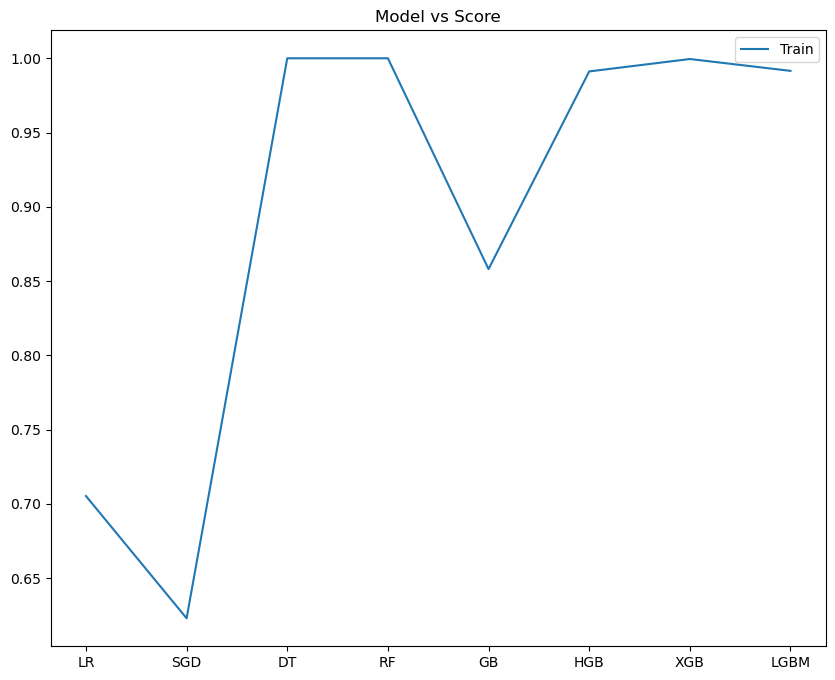

In [67]:
# check model accuracy
print(model_score)
plt.plot(model_score['model'], model_score['Train'])
plt.legend(['Train'])
plt.title('Model vs Score')
plt.show()

In [71]:
from sklearn.model_selection import train_test_split
from lightgbm import early_stopping, log_evaluation

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

lgbm = LGBMClassifier(random_state=0, force_col_wise=True, n_estimators=400)

lgbm.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='logloss',
    callbacks=[early_stopping(stopping_rounds=100), log_evaluation(50)]
)

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Total Bins 607
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

LGBMClassifier(force_col_wise=True, n_estimators=400, random_state=0)

In [111]:
# Define the path where the Excel file will be saved
save_path = 'output_file.csv'  # Update the filename as needed

# Save the dataframe as an Excel file
df.to_csv(save_path, index=False)


In [113]:
save_path = r'C:\Users\LENOVO\Downloads\titanic\output_file.csv'

In [115]:
import pandas as pd
df = pd.read_csv("output_file.csv", encoding="ISO-8859-1")  # Try a different encoding
df.to_csv("output_file_fixed.csv", encoding="utf-8", index=False)